In [1]:
import pandas as pd

In [2]:
exp_inc = pd.read_csv("expenses_and_income.csv", sep = ";")
exp_inc

,Date,Description,Category,Out,In
0,2020-06-02,Salary Frank,Income,0.00,4896.44
1,2020-06-03,supermarket,food and beverages,132.40,0.00
2,2020-06-04,Salary Laura,Income,0.00,4910.14
3,2929-06-04,"GreenEnergy Corp., (electricity)",utility,87.34,0.00
4,2020-06-09,water and sewage,utility,60.56,0.00
5,2020-06-10,"Fitness studio, Jane",health and sports,19.00,0.00
6,2020-06-11,payment to bank,monthly redemption payment,1287.43,0.00
7,2020-06-12,LeGourmet Restaurant,restaurants and hotels,145.00,0.00
8,2020-06-13,supermarket,food and beverages,197.42,0.00
9,2020-06-13,Pizzeria da Pulcinella,restaurants and hotels,60.00,0.00


In [3]:
exp_inc[["Out", "In"]].sum()

Out     5097.44
In     19613.16
dtype: float64

In [4]:
category_sums = exp_inc.groupby("Category").sum()
category_sums

,Out,In
Category,,
Income,0.00,19613.16
education and culture,144.00,0.00
food and beverages,1174.61,0.00
health and sports,650.18,0.00
insurances and taxes,167.89,0.00
monthly redemption payment,2574.86,0.00
restaurants and hotels,238.00,0.00
utility,147.90,0.00


In [5]:
category_sums.index

Index(['Income', 'education and culture', 'food and beverages',
       'health and sports', 'insurances and taxes',
       'monthly redemption payment', 'restaurants and hotels', 'utility'],
      dtype='object', name='Category')

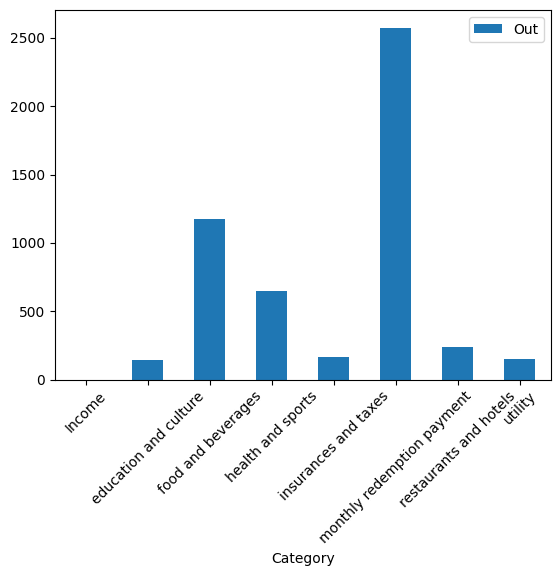

In [6]:
import matplotlib.pyplot as plt
ax = category_sums.plot.bar(y = "Out") # reserved variable 
plt.xticks(rotation = 45)
plt.show()

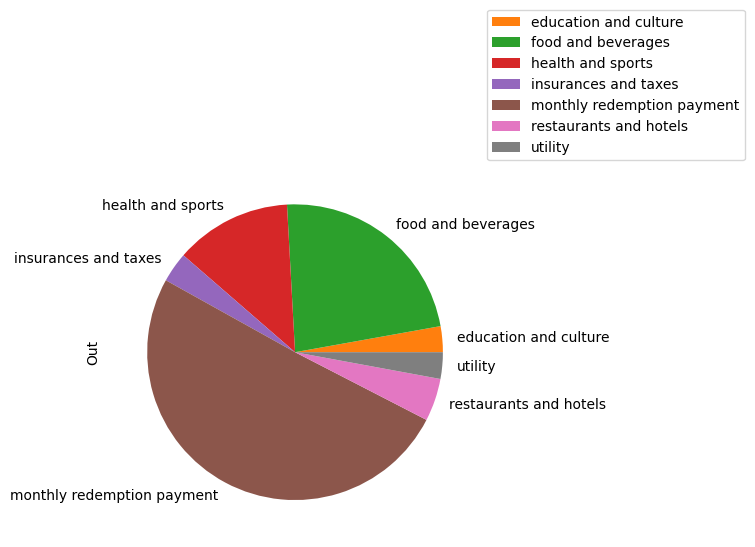

In [7]:
ax = category_sums.plot.pie(y="Out")
ax.legend(loc="lower left", bbox_to_anchor=(1, 1))

In [8]:
# label categories
category2account = {'monthly redemption payment': '200',
                    'insurances and taxes': '201',
                    'food and beverages': '202',
                    'education and culture': '203',
                    'transport': '204',
                    'health and sports': '205',
                    'household goods and services': '206',
                    'clothing': '207',
                    'communications': '208',
                    'restaurants and hotels': '209',
                    'utility': '210',
                    'other expenses': '211',
                    'Income': '400'}

In [9]:
# replace category names with labels
exp_inc.replace(category2account, inplace = True)
# dictionary match keys to value!

exp_inc.rename(columns = {"Category": "Account"}, inplace = True)
exp_inc[:5]

,Date,Description,Account,Out,In
0,2020-06-02,Salary Frank,400,0.00,4896.44
1,2020-06-03,supermarket,202,132.40,0.00
2,2020-06-04,Salary Laura,400,0.00,4910.14
3,2929-06-04,"GreenEnergy Corp., (electricity)",210,87.34,0.00
4,2020-06-09,water and sewage,210,60.56,0.00


In [10]:
account_numbers = pd.Series(list(category2account.keys()), index=category2account.values())
account_numbers.name = "Description"
account_numbers.rename("Accounts")

200      monthly redemption payment
201            insurances and taxes
202              food and beverages
203           education and culture
204                       transport
205               health and sports
206    household goods and services
207                        clothing
208                  communications
209          restaurants and hotels
210                         utility
211                  other expenses
400                          Income
Name: Accounts, dtype: object

In [11]:
exp_inc.insert(1, "accounts", account_numbers)

In [12]:
exp_inc

,Date,accounts,Description,Account,Out,In
0,2020-06-02,monthly redemption payment,Salary Frank,400,0.00,4896.44
1,2020-06-03,monthly redemption payment,supermarket,202,132.40,0.00
2,2020-06-04,monthly redemption payment,Salary Laura,400,0.00,4910.14
3,2929-06-04,monthly redemption payment,"GreenEnergy Corp., (electricity)",210,87.34,0.00
4,2020-06-09,monthly redemption payment,water and sewage,210,60.56,0.00
5,2020-06-10,monthly redemption payment,"Fitness studio, Jane",205,19.00,0.00
6,2020-06-11,monthly redemption payment,payment to bank,200,1287.43,0.00
7,2020-06-12,monthly redemption payment,LeGourmet Restaurant,209,145.00,0.00
8,2020-06-13,monthly redemption payment,supermarket,202,197.42,0.00
9,2020-06-13,monthly redemption payment,Pizzeria da Pulcinella,209,60.00,0.00
